In [109]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly
import plotly.express as px
import matplotlib.pyplot as plt
import statsmodels.api         as sm
import statsmodels.formula.api as smf
from sklearn import tree
from sklearn import metrics
from sklearn import neighbors
from sklearn import ensemble
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, Dense, GlobalMaxPooling1D, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
%matplotlib inline

EDA y modelos , por Victor Manuel Rodriguez De La Hoz

Librerias necesarias para realizar el EDA y los modelos necesarios .

**EDA**

In [2]:
df = pd.read_excel('Pruebadatos.xlsx')

In [3]:
df['Año']= df['Año/Semana'].apply(lambda x: int((x-int(x))*10000))
df['Semana']= df['Año/Semana'].apply(lambda x: int(x))

Se separa en una columna los años y las semanas en otra columna para hacer un analisis separado de cada una y despues utilizar la columna que vienen en conjunto.


In [4]:
df['ConceptoDiseño']=df['Mat:Concepto Diseño']
del(df['Mat:Concepto Diseño'])

Se le cambia el nombre a la columna para que tengo un nombre mas entendible y facil de utilizar.

In [5]:
df.isnull().sum()

Año               0
Año/Semana        0
Centro            0
Material          0
Color             0
Talla             0
Unidades          0
Semana            0
ConceptoDiseño    0
dtype: int64

Se analiza si hay datos perdidos o vacios en el dataset.

In [6]:
df.head(6)

,Año,Año/Semana,Centro,Material,Color,Talla,Unidades,Semana,ConceptoDiseño
0,2017,1.2017,T013,5133050,Rojo 18-1763,10,1,1,BASICOS CLASICOS
1,2017,1.2017,T013,5133196,Azul 19-4050,10,2,1,BASICOS CLASICOS
2,2017,1.2017,T013,5133196,Negro 19-4006,8,2,1,BASICOS CLASICOS
3,2017,1.2017,T013,5133197,Azul 19-3921,6,1,1,BASICOS CLASICOS
4,2017,1.2017,T013,5133197,Azul 19-3939,8,1,1,BASICOS CLASICOS
5,2017,1.2017,T013,5133198,Verde 16-5127,6,2,1,BASICOS CLASICOS


Despues se mira como esta el dataset despues de los pequeños cambios hechos

<AxesSubplot:xlabel='Porcentajes', ylabel='ConceptoDiseño'>

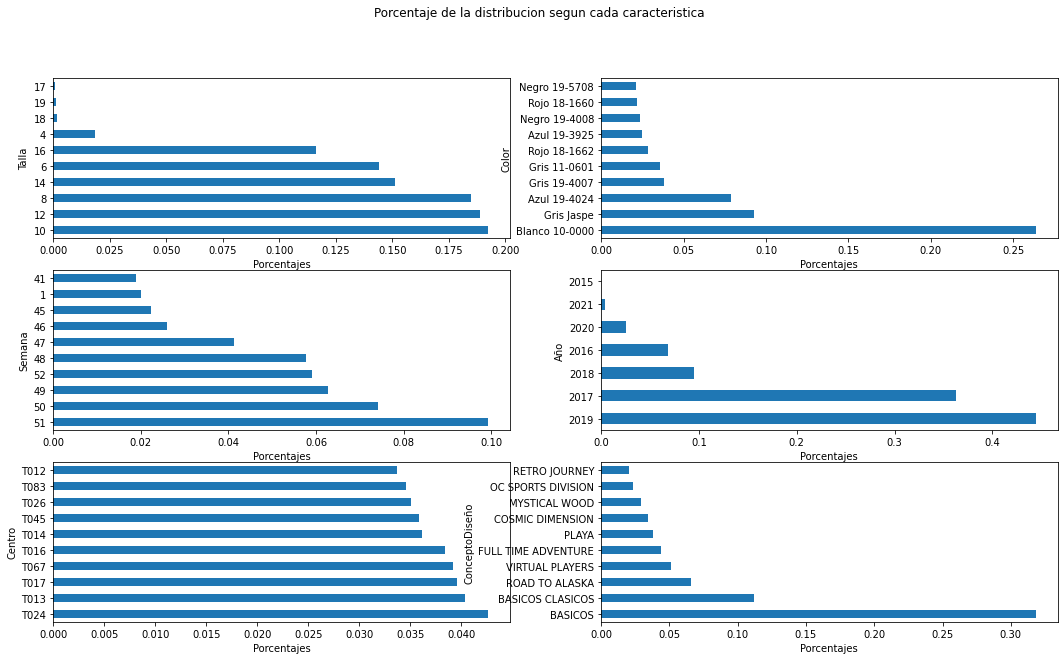

In [110]:
plt.figure(figsize=(18,10))
plt.suptitle("Porcentaje de la distribucion segun cada caracteristica")
plt.subplot(3,2,1)
plt.ylabel('Talla')
plt.xlabel('Porcentajes')
df.Talla.value_counts(normalize=True).head(10).plot.barh()  
plt.subplot(3,2,2)
plt.ylabel('Color')
plt.xlabel('Porcentajes')
df.Color.value_counts(normalize=True).head(10).plot.barh()
plt.subplot(3,2,3)
plt.ylabel('Semana')
plt.xlabel('Porcentajes')
df.Semana.value_counts(normalize=True).head(10).plot.barh()
plt.subplot(3,2,4)
plt.ylabel('Año')
plt.xlabel('Porcentajes')
df.Año.value_counts(normalize=True).head(10).plot.barh()
plt.subplot(3,2,5)
plt.ylabel('Centro')
plt.xlabel('Porcentajes')
df.Centro.value_counts(normalize=True).head(10).plot.barh()
plt.subplot(3,2,6)
plt.ylabel('ConceptoDiseño')
plt.xlabel('Porcentajes')
df.ConceptoDiseño.value_counts(normalize=True).head(10).plot.barh()

Lo primero que me parece necesario hacer es mirar que caracteristicas tienen mayor o menor cantidad de apariciones dentro de nuestro dataset e ir preguntandose el porque. 

Dentro de las caracteristicas de la talla se puede ver que las tallas que menos apariciones hay son la M,L y S ,esto se puede deber a que ya son tallas que muchos niños no tienen y esta articulos de ropa esta mucho mas enfocada en poblacion infantil que probablemente no ha terminado su desarrollo y todavia tienen tallas mucho menores que esas. Por otro lado la talla 12,8 y 10 estan en el top 3 en esta caracteristica lo cual es un dato importante a tener en cuenta debido a que indica que es una poblacion que esta fuertemente interesada en OFFCORSS.

Dentro de los colores se puede ver que no hay tendencias hacia un color que no guste pero si hay tendencia a que hay tres colores que tienen mas apariciones , estos son colores que dependiendo de la temporada ,la region ,la edad y la tendencia pueden repetirse debido a que se ve una tendencia a comprar ropa de estos colores .

Con respecto a las semanas se va que hay una tendencia muy grande a comprar ropa a finales de año mas que en otras temporadas , esto puede ser ocasionado a las festividades y aprovechar las temporadas de consumo mas altas que estan ligadas a los ultimos dos meses del año.

El año es un dato que puede estar muy ligado a la pandemia y que en esa epoca tal vez no se compro mucha ropa , pero es importante tener en cuenta que se hizo en el año 2019 y 2017 para saber cual fue la estrategia para generar las ventas.

Con respecto a los conceptos de diseño se puede ver una tendencia muy alta a comprar Basicos y Basicos clasicos ,lo cual es una informacion importante porque puede que esta sea un tipo de ropa en la que se deba explorar mas y explotar el hecho de que los clientes la compren a lo largo del tiempo.

Los centro por ahora no reflejan una gran discrepancia entre ellos pero es importante resaltar que este es un analisis basico y primario y puede que mas adelante este sea un factor a tener mucha importancia.

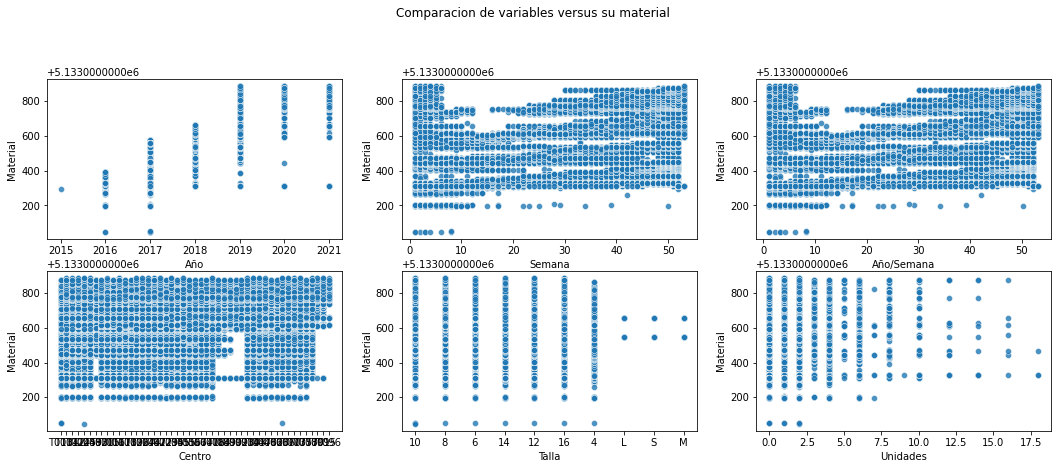

In [7]:
varstolook = ['Año','Semana','Año/Semana','Centro','Talla','Unidades']

plt.figure(figsize=(18,10))
plt.suptitle("Comparacion de variables versus su material")
for i,var in enumerate(varstolook):
    plt.subplot(3,3,i+1)
    sns.scatterplot(x=var,y='Material',data=df, alpha=0.8)

Se analiza el material contra las otras caracteristicas porque aca nos podemos dar cuenta que tipo de material esta mucho mas ligado a algunas temporadas y poblaciones.

Primero se puede ver que al pasar de los años si han habido cambios bruscos con respecto al material y que en cada año se va cambiando el material o van cambiando las tendencias , esto es un factor clave debido a que si se compara con las semanas se puede ver que tambien hay semanas en las que se descarta ciertos materiales y hay ocurrencia en otros, esto se le podria llamar temporadas en las que hay tendencia hacia ciertos materiales y es muy importante tener en cuenta este factor.

Con respecto a los centros se ve que hay ciertos centros que estan descartando una buena cantidad de materiales , por tanto hay que analizar que tipo de materiales son los que no estan presentes dentro de las compras en esos centros y el porque,puede ser por el clima o por la moda en esos centros.

Dentro de las tallas y unidades no hay un factor clave que se pueda destacar pero era importante tener en cuenta estos datos.

# Modelos

**Acondicionamiento de las variables**

In [99]:
import re
from re import split

df.loc[df.Talla=='L','Talla' ] = '17'
df.loc[df.Talla=='S','Talla' ] = '18'
df.loc[df.Talla=='M','Talla' ] = '19'
df['Talla1']=pd.to_numeric(df.Talla, errors='coerce')
df['Color1'] =df['Color'].apply(lambda x: filter(str.isdigit, x))
df['Color2'] =df['Color1'].apply(lambda x: "".join(x) )
df['Color3']=pd.to_numeric(df.Color2, errors='coerce')
df['Color4']=df['Color3'].fillna(0)

Por motivo de los modelos se les da valores numericos a las caracteristicas que contenga strings o se convierten a variables categoricas si es necesario.

**Creacion de los datos de entrenamiento y de testeo**

In [100]:
np.random.seed(1337)
                    
ndata = len(df)

idx_train = np.random.choice(range(ndata),int(0.8*ndata),replace=False)
idx_test  = np.asarray(list(set(range(ndata)) - set(idx_train)))
train     = df.iloc[idx_train] 
test      = df.iloc[idx_test]  
print(train.shape) 
print(test.shape) 

(202664, 14)
(50667, 14)


**Regresion linear**

In [105]:
model_all = smf.ols(formula = "Unidades ~ Semana+Material+Talla1+Color4", 
                 data = train).fit()
model_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Unidades   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     160.8
Date:                Tue, 02 Nov 2021   Prob (F-statistic):          1.24e-137
Time:                        05:56:23   Log-Likelihood:            -3.0631e+05
No. Observations:              202664   AIC:                         6.126e+05
Df Residuals:                  202659   BIC:                         6.127e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    302.1662     77.680      3.890      0.000     149.915     454.417
Semana         0.0039      0.000     24.166      0.000       0.004       0.004
Material   -5.865e-05   1.51e-05     -3.876      0.000   -8.83e-05    -2.9e-05
Talla1        -0.0033      0.001     -4.517      0.000      -0.005      -0.002
Color4     -1.873e-07   4.01e-08     -4.670      0.000   -2.66e-07   -1.09e-07
==============================================================================
Omnibus:                    77622.354   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           637891.707
Skew:                           1.626   Prob(JB):                         0.00
Kurtosis:                      11.060   Cond. No.                     1.64e+11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.64e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

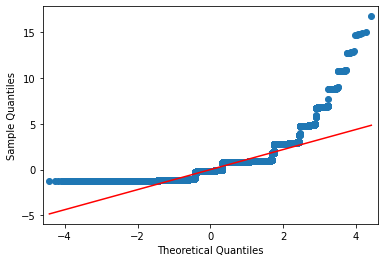

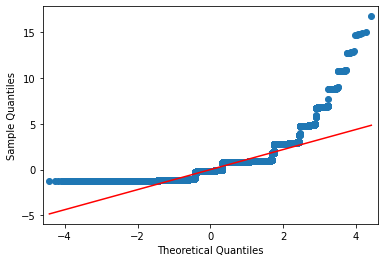

In [106]:
sm.qqplot(model_all.resid, line="s")

Como se puede ver este modelo tiene ciertas imprecisiones que se pueden corregir en un futuro mirando inbalances , posibles sesgos ,covarianzas y organizaciones de datos . Pero es un modelo inicial que sirve para la prediccion de unidades utilizando caracteristicas. No se utilizo la columna de concepto diseño debido a que se hace uso de el concepto de PLU y sus tres caracteristicas que lo componen ,por lo tanto al estar implicito este concepto el diseño tambien esta adentro de este y se ahorra procesamiento y creacion de variables categoricas o dummies basadas en esta columna.

**Arbol de decision**

In [101]:
from sklearn.tree import DecisionTreeRegressor
covariates=['Semana','Material','Talla1','Color4']
model2tt=DecisionTreeRegressor(max_depth=4)
model2tree=model2tt.fit(train[covariates],train['Unidades'])

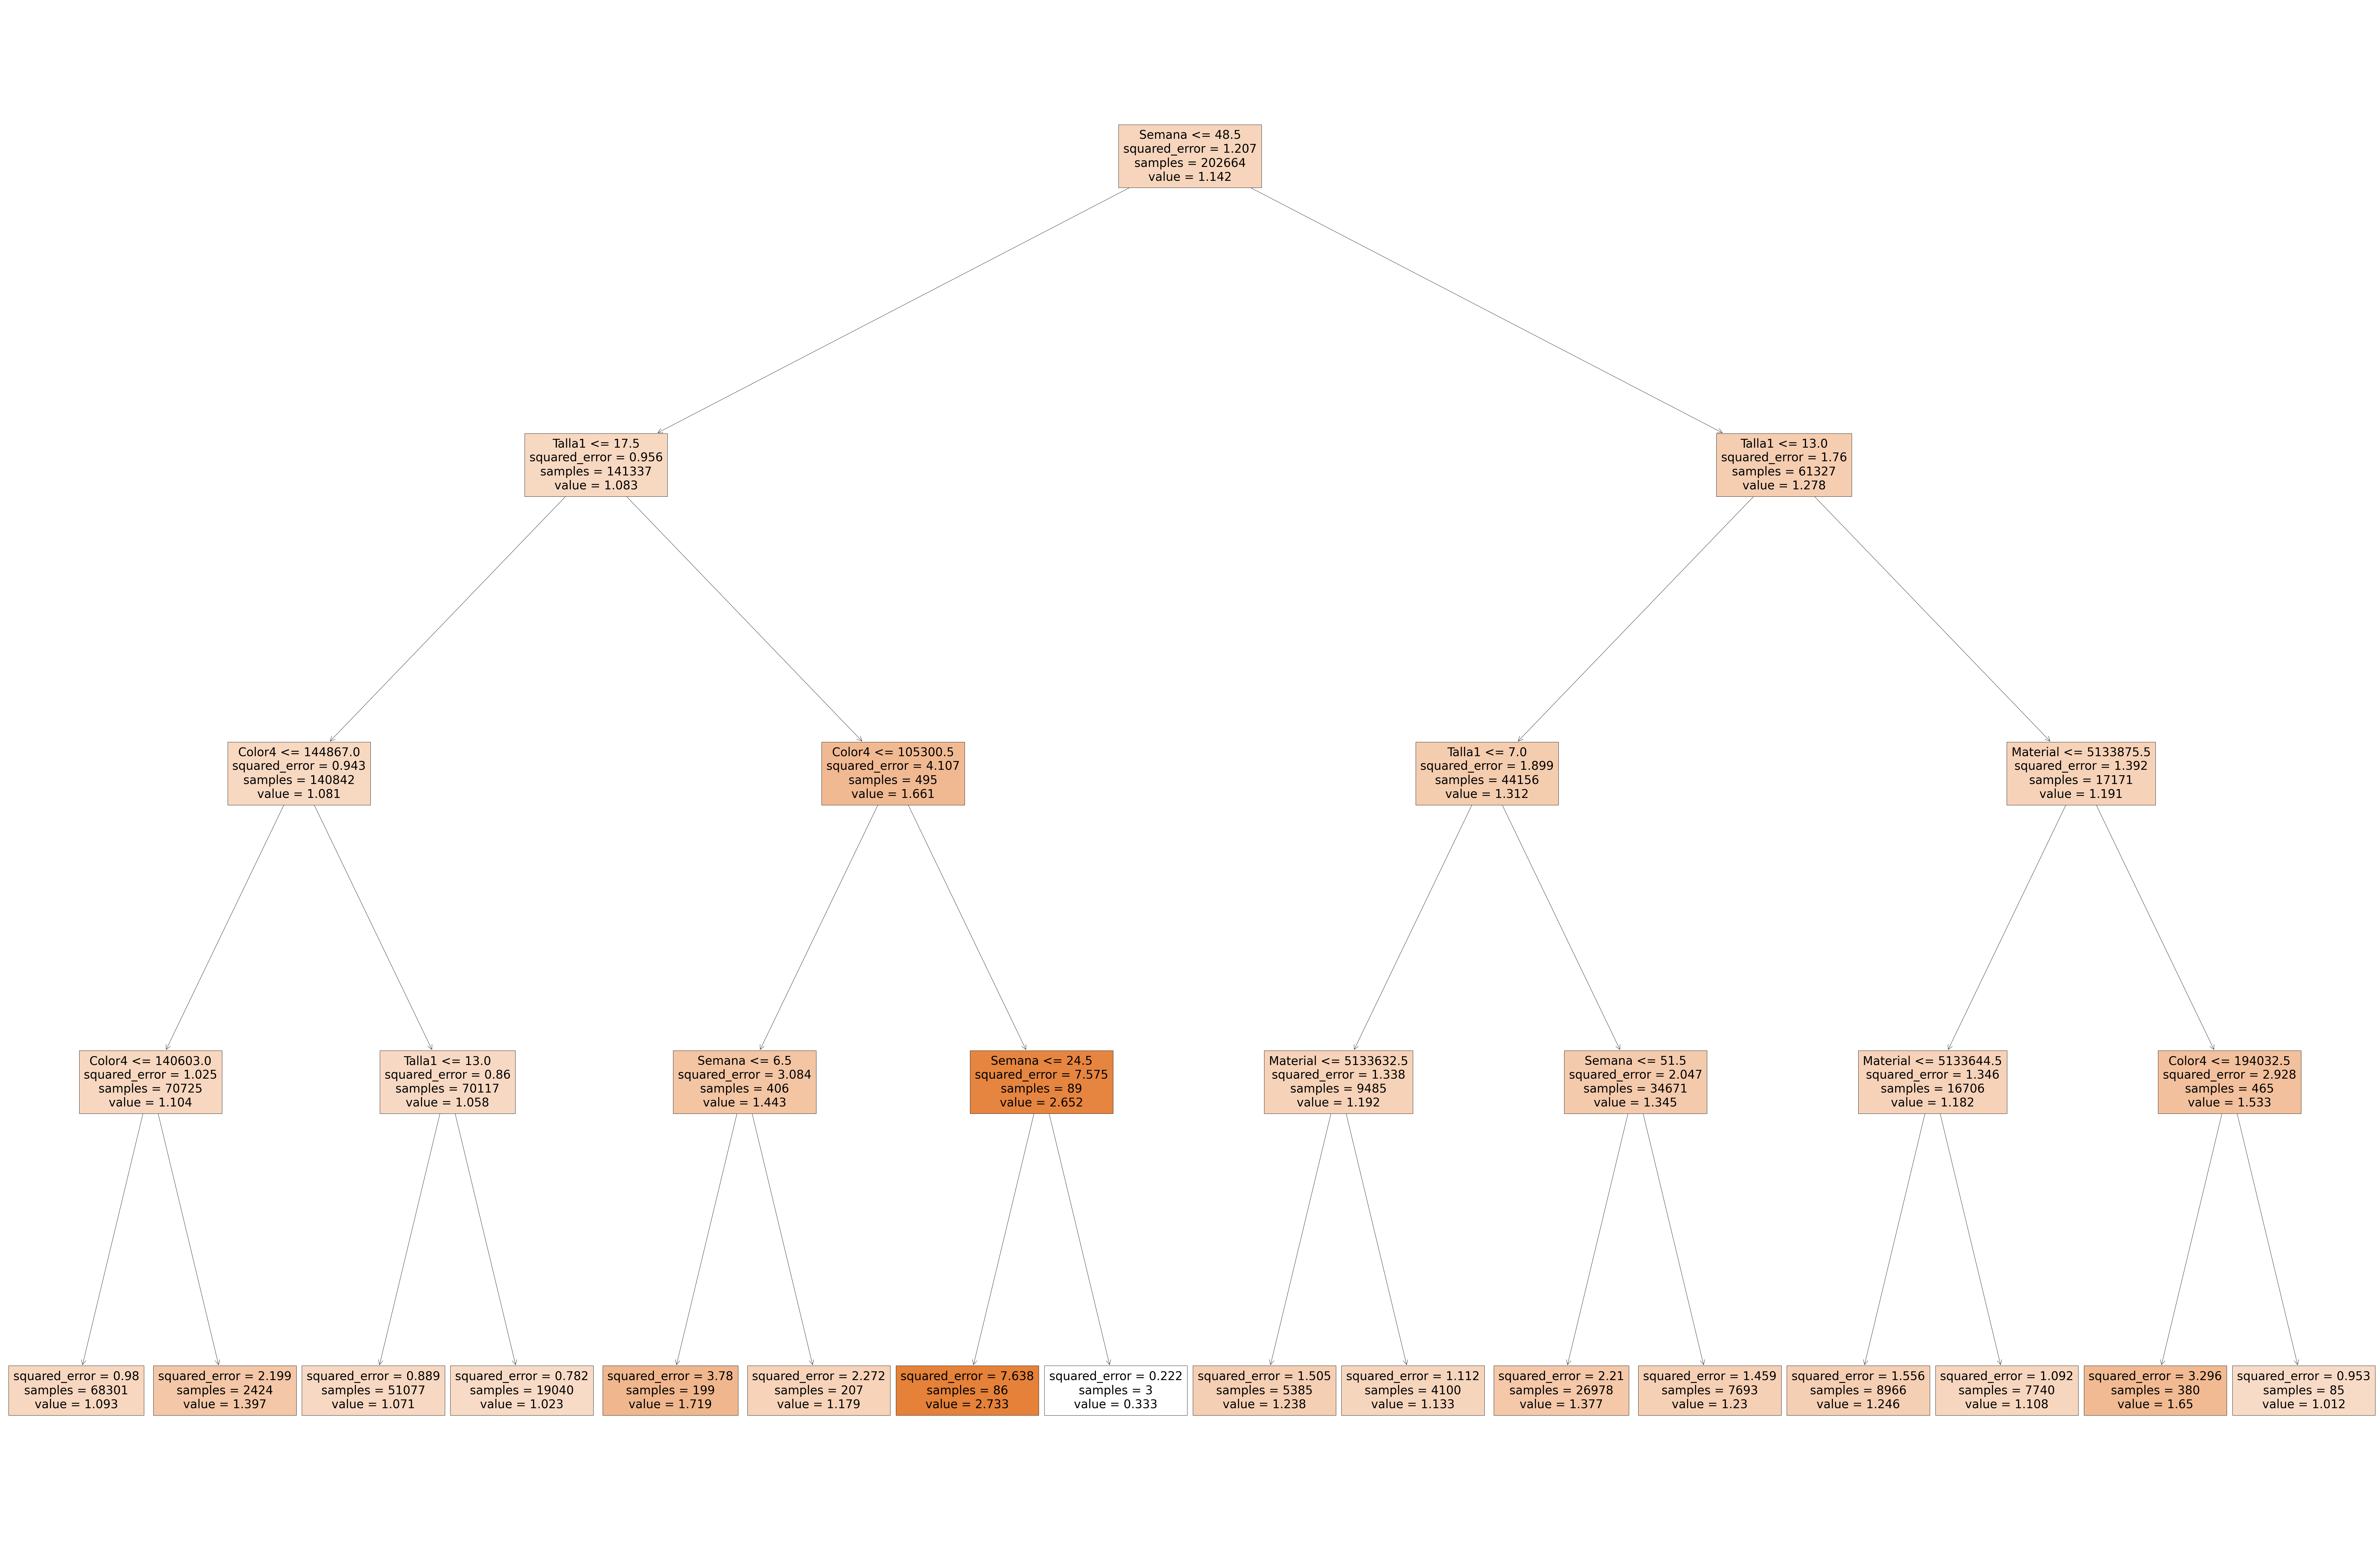

In [102]:
fig = plt.gcf()
fig.set_size_inches(150, 100)
tree.plot_tree(model2tree,filled=True,feature_names=covariates)
fig.savefig('tree.png')

In [103]:
text_representation = tree.export_text(model2tree)

print(text_representation)

|--- feature_0 <= 48.50
|   |--- feature_2 <= 17.50
|   |   |--- feature_3 <= 144867.00
|   |   |   |--- feature_3 <= 140603.00
|   |   |   |   |--- value: [1.09]
|   |   |   |--- feature_3 >  140603.00
|   |   |   |   |--- value: [1.40]
|   |   |--- feature_3 >  144867.00
|   |   |   |--- feature_2 <= 13.00
|   |   |   |   |--- value: [1.07]
|   |   |   |--- feature_2 >  13.00
|   |   |   |   |--- value: [1.02]
|   |--- feature_2 >  17.50
|   |   |--- feature_3 <= 105300.50
|   |   |   |--- feature_0 <= 6.50
|   |   |   |   |--- value: [1.72]
|   |   |   |--- feature_0 >  6.50
|   |   |   |   |--- value: [1.18]
|   |   |--- feature_3 >  105300.50
|   |   |   |--- feature_0 <= 24.50
|   |   |   |   |--- value: [2.73]
|   |   |   |--- feature_0 >  24.50
|   |   |   |   |--- value: [0.33]
|--- feature_0 >  48.50
|   |--- feature_2 <= 13.00
|   |   |--- feature_2 <= 7.00
|   |   |   |--- feature_1 <= 5133632.50
|   |   |   |   |--- value: [1.24]
|   |   |   |--- feature_1 >  5133632.50
| 

En este arbol de decision se tuvieron en cuenta las mismas variables de diseño de modelo de el primer modelo de arriba por las mismas razones. Se pone tanto el texto de el arbol de decision como la imagen para mejor comprension .

**Muchas gracias**